<a href="https://colab.research.google.com/github/lalitbhattarai/Pytorch_Fundamentals/blob/main/Model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Putting everyhing togethrt

We are going to biuld the modle in this more clearly.

We are just putting everything we did in python Fundamentals chaper together


In [157]:
#import pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#checking torch version\
torch.__version__

'2.5.1+cu124'

Create device_agnostic Code

This means is we've got access to a GPU ,our cdoe will use it( forr potentially faster computing)

If no GPU is available ,the cdoe will defult to using cpu

In [158]:
#setup device agonistic code
device ="cuda" if torch.cuda.is_available(  ) else "cpu"
print(f"Deviced used :{device}")

Deviced used :cuda


### 1.1 DATA

In [159]:
#Create some data using the linear regression formula of y=weight + X + bias
weight=0.3
bias=0.7

#create arange value
start=0
end=1
step=0.01

#Create a X and y (features and lables)
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight * X +bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.7000],
         [0.7030],
         [0.7060],
         [0.7090],
         [0.7120],
         [0.7150],
         [0.7180],
         [0.7210],
         [0.7240],
         [0.7270]]))

In [160]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [161]:
#Split data
train_split=int(0.8 *len(X) )
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_test),len(y_test),len(X_train),len(y_train)

(20, 20, 80, 80)

In [162]:
import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data, and compares predictions.
    """
    plt.figure(figsize=(10,7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

    # Plot test data in red (Fixed incorrect y-axis)
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")

    # Plot predictions if available
    if predictions is not None:

        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size":14})

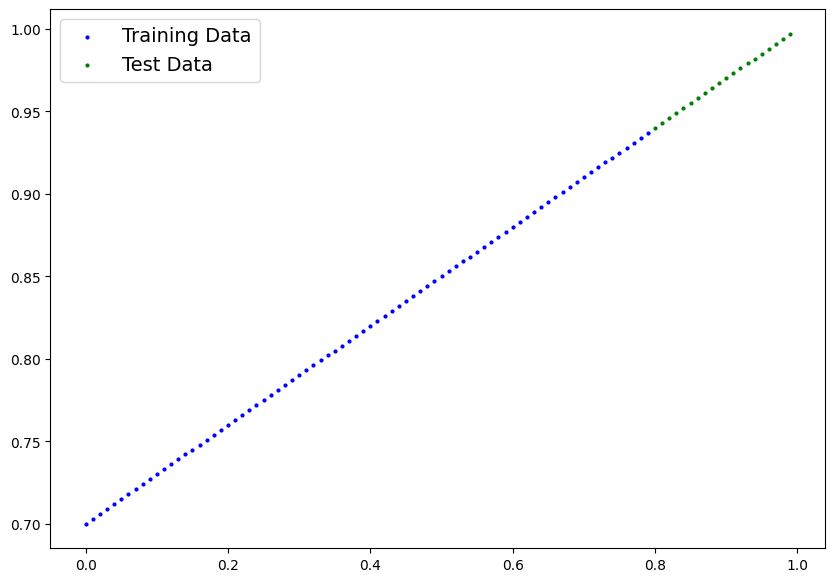

In [163]:
#Plote the data

#note :ifyou dont have plot_prediction loaded it will give an error
plot_predictions(X_train,y_train,X_test,y_test)

In [164]:
#Building a pytorch linear mdoel
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(). __init__()

    # use nn>linear( ) for  creting the dmoel nparameterd also acalled linear trnasfoirm,probing layer,fully connected layer,dense layer

    self.linear_layer=nn.Linear(in_features=1,
                                out_features=1)

    #Forward ,method to define the computational in the model

  def forward(self,x:torch.Tensor) ->torch.tensor:
    return self.linear_layer(x)


    #set the manual seed

torch.manual_seed(42)
model_1=LinearRegressionModel()
model_1,model_1.state_dict()



(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [165]:
X_train[:5],y_train[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.7000],
         [0.7030],
         [0.7060],
         [0.7090],
         [0.7120]]))

In [166]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [167]:
#Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device


device(type='cuda', index=0)

### 1.3 Training

For trainning we need

* loss function
* optimizer
* Training Loop
* testing loop


In [168]:
#setup loss function
loss_fn=nn.L1Loss() # same as MAE

#setup our optim,izer
optimizer =torch.optim.SGD(params=model_1.parameters(),
                           lr=0.01)

In [169]:
torch.manual_seed(42)

epochs=300

#Put data oin target device
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)

for epoc in range(epochs):
  model_1.train()

  y_preds=model_1(X_train)

  #calculate the loss
  loss=loss_fn(y_preds,y_train)

  #optimize zero grade
  optimizer.zero_grad()

  # Perform Backpropragation
  loss.backward()

  #Optimize step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred=model_1(X_test)

    test_loss=loss_fn(test_pred,y_test)

    #Print out what's happening

  if epochs % 10== 0:
    print(f"Epochs :{epoc}  | Loss: {loss}  | Test loss:{ test_loss}")

Epochs :0  | Loss: 0.31350064277648926  | Test loss:0.5322346687316895
Epochs :1  | Loss: 0.3019404113292694  | Test loss:0.5186994075775146
Epochs :2  | Loss: 0.2903801500797272  | Test loss:0.5051641464233398
Epochs :3  | Loss: 0.2788199186325073  | Test loss:0.4916289448738098
Epochs :4  | Loss: 0.2672596871852875  | Test loss:0.4780937135219574
Epochs :5  | Loss: 0.2556994557380676  | Test loss:0.4645584523677826
Epochs :6  | Loss: 0.2441391944885254  | Test loss:0.45102325081825256
Epochs :7  | Loss: 0.23257894814014435  | Test loss:0.43748798966407776
Epochs :8  | Loss: 0.2210187017917633  | Test loss:0.42395272850990295
Epochs :9  | Loss: 0.20945847034454346  | Test loss:0.41041746735572815
Epochs :10  | Loss: 0.1978982388973236  | Test loss:0.3968822658061981
Epochs :11  | Loss: 0.18633799254894257  | Test loss:0.3833470046520233
Epochs :12  | Loss: 0.17477774620056152  | Test loss:0.3698117434978485
Epochs :13  | Loss: 0.16321751475334167  | Test loss:0.3562765419483185
Epochs

In [170]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3073]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.7025], device='cuda:0'))])

### 1.4  making and evaluting predictions

In [171]:
#Turn model on the test data
model_1.eval()
y_preds=model_1(X_test)
y_preds

tensor([[0.9484],
        [0.9514],
        [0.9545],
        [0.9576],
        [0.9607],
        [0.9637],
        [0.9668],
        [0.9699],
        [0.9730],
        [0.9760],
        [0.9791],
        [0.9822],
        [0.9853],
        [0.9883],
        [0.9914],
        [0.9945],
        [0.9975],
        [1.0006],
        [1.0037],
        [1.0068]], device='cuda:0', grad_fn=<AddmmBackward0>)

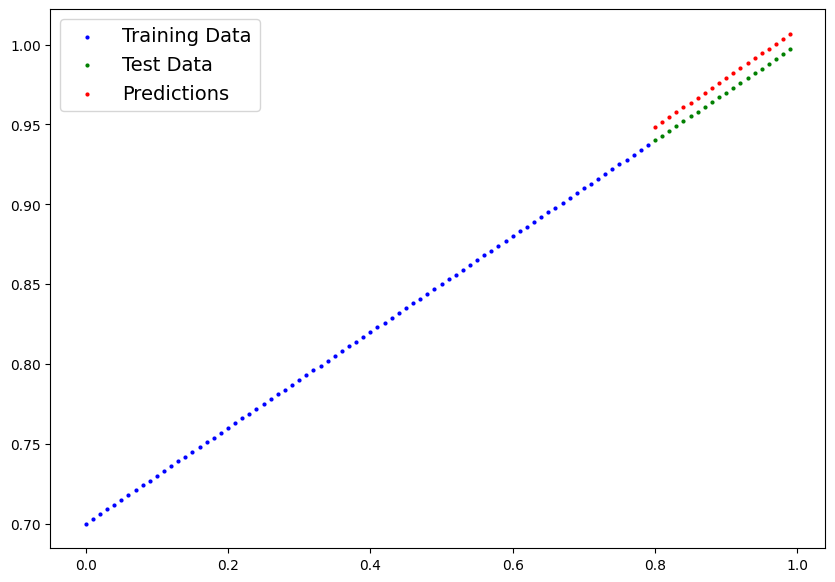

In [172]:
#check out our model predictions  vbisually
plot_predictions(predictions=y_preds.detach().cpu().numpy())


### Saving and loading trained model

In [173]:
#saving our PyTorch model
from pathlib import Path

#1. Creae model dictonaries
MODEL_PATH=Path("Models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#2. Create model save path
MODEL_NAME="Model_building.pth"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME

#save the model state dict
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)



saving model to: Models/Model_building.pth


In [174]:
#load a putorch model

#createing a new instance of linear regeression mdoele
loaded_model_1=LinearRegressionModel()

#loade the dave mdoel dict model_1
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

#pUT THE loaded deviceto model
loaded_model_1.to(device)

<ipython-input-174-2f5429682773>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [175]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [176]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3073]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.7025], device='cuda:0'))])

In [177]:
#EVAULATE THE LOADED MODEL

loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds=loaded_model_1(X_test)
y_preds ==loaded_model_1_preds



tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')